In [2]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Import Cleaned Data

In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
census_data = pd.read_csv("censusData/ageAndSex.csv")
income = pd.read_csv("censusData/income.csv")
medicaid_data = pd.read_csv("cleanedData/medicadeAggregate.csv")
clea_census_data = pd.read_csv("cleanedData/medicarePopulation.csv")
medicare_data = pd.read_csv("cleanedData/medicareEnroll.csv")
# Display sample data
census_data.head(10)

,Acsst5Y2010.S0101-Data.1.2,Geography,Geographic Area Name,Total Estimate Total Population,Male Estimate Total Population,Female Estimate Total Population,Total Estimate Age Under 5 Years,Male Estimate Age Under 5 Years,Female Estimate Age Under 5 Years,Total Estimate Age 5 To 9 Years,...,Female Estimate Summary Indicators Age Dependency Ratio Old-Age Dependency Ratio,Total Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Male Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Female Estimate Summary Indicators Age Dependency Ratio Child Dependency Ratio,Total Estimate Percent Imputed Sex,Male Estimate Percent Imputed Sex,Female Estimate Percent Imputed Sex,Total Estimate Percent Imputed Age,Male Estimate Percent Imputed Age,Female Estimate Percent Imputed Age
0,2010,0400000US01,Alabama,4712651.0,2285905.0,2426746.0,6.4,6.7,6.1,6.6,...,(X),38.4,(X),(X),0.2,(X),(X),1.0,(X),(X)
1,2010,0400000US02,Alaska,691189.0,358919.0,332270.0,7.4,7.4,7.4,7.2,...,(X),40.6,(X),(X),0.1,(X),(X),1.2,(X),(X)
2,2010,0400000US04,Arizona,6246816.0,3108234.0,3138582.0,7.4,7.6,7.2,7.0,...,(X),42.5,(X),(X),0.2,(X),(X),1.2,(X),(X)
3,2010,0400000US05,Arkansas,2872684.0,1408945.0,1463739.0,6.8,7.1,6.5,6.8,...,(X),40.1,(X),(X),0.2,(X),(X),0.6,(X),(X)
4,2010,0400000US06,California,36637290.0,18223157.0,18414133.0,6.9,7.1,6.8,6.8,...,(X),40.1,(X),(X),0.2,(X),(X),1.3,(X),(X)
5,2010,0400000US08,Colorado,4887061.0,2448492.0,2438569.0,7.0,7.1,6.8,6.9,...,(X),37.9,(X),(X),0.2,(X),(X),1.0,(X),(X)
6,2010,0400000US09,Connecticut,3545837.0,1724834.0,1821003.0,5.8,6.1,5.5,6.4,...,(X),37.2,(X),(X),0.2,(X),(X),1.1,(X),(X)
7,2010,0400000US10,Delaware,881278.0,427218.0,454060.0,6.4,6.7,6.1,6.4,...,(X),37.1,(X),(X),0.2,(X),(X),0.9,(X),(X)
8,2010,0400000US11,District of Columbia,584400.0,276101.0,308299.0,5.5,6.0,5.2,4.5,...,(X),24.9,(X),(X),0.2,(X),(X),1.4,(X),(X)
9,2010,0400000US12,Florida,18511620.0,9050155.0,9461465.0,5.8,6.1,5.6,5.8,...,(X),35.3,(X),(X),0.2,(X),(X),1.3,(X),(X)


In [5]:
medicare_data.head(10)

,State_Name,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Code,Item
0,Alabama,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,Alaska,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,Arizona,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,Arkansas,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,California,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)
5,Colorado,625,650,688,722,755,786,816,840,11,Medicare Enrollee Population (Thousands)
6,Connecticut,568,577,595,608,619,630,642,654,11,Medicare Enrollee Population (Thousands)
7,Delaware,149,154,161,168,175,181,187,193,11,Medicare Enrollee Population (Thousands)
8,District of Columbia,78,80,82,84,87,88,90,91,11,Medicare Enrollee Population (Thousands)
9,Florida,3375,3472,3621,3757,3900,4040,4164,4289,11,Medicare Enrollee Population (Thousands)


In [6]:
medicare_data.columns = medicare_data.columns.str.strip()
medicare_data.rename(columns={
    'State_Name': 'State',
    'Y2010': 'Medicare 2010',
    'Y2011': 'Medicare 2011',
    'Y2012': 'Medicare 2012',
    'Y2013': 'Medicare 2013',
    'Y2014': 'Medicare 2014',
    'Y2015': 'Medicare 2015',
    'Y2016': 'Medicare 2016',
    'Y2017': 'Medicare 2017',


    }, inplace=True)
medicare_data.head(10)

,State,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Code,Item
0,Alabama,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,Alaska,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,Arizona,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,Arkansas,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,California,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)
5,Colorado,625,650,688,722,755,786,816,840,11,Medicare Enrollee Population (Thousands)
6,Connecticut,568,577,595,608,619,630,642,654,11,Medicare Enrollee Population (Thousands)
7,Delaware,149,154,161,168,175,181,187,193,11,Medicare Enrollee Population (Thousands)
8,District of Columbia,78,80,82,84,87,88,90,91,11,Medicare Enrollee Population (Thousands)
9,Florida,3375,3472,3621,3757,3900,4040,4164,4289,11,Medicare Enrollee Population (Thousands)


In [7]:
for col in medicare_data.columns:
    print(col)

State
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [8]:
medicare_data.columns = medicare_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
year_medicare_data_2010 = medicare_data[["State", "Medicare 2010"]]
year_medicare_data_2011 = medicare_data[["State", "Medicare 2011"]]
year_medicare_data_2012 = medicare_data[["State", "Medicare 2012"]]
year_medicare_data_2013 = medicare_data[["State", "Medicare 2013"]]
year_medicare_data_2014 = medicare_data[["State", "Medicare 2014"]]
year_medicare_data_2015 = medicare_data[["State", "Medicare 2015"]]
year_medicare_data_2016 = medicare_data[["State", "Medicare 2016"]]
year_medicare_data_2017 = medicare_data[["State", "Medicare 2017"]]

# Show the resulting DataFrame
year_medicare_data_2010.head(10)


,State,Medicare 2010
0,Alabama,845
1,Alaska,66
2,Arizona,930
3,Arkansas,531
4,California,4757
5,Colorado,625
6,Connecticut,568
7,Delaware,149
8,District of Columbia,78
9,Florida,3375


In [9]:
clea_census_data.head()

,Unnamed: 0,Acsst5Y2010.S0101-Data.1.2,Geographic Area Name,Total Estimate Total Population,Total Estimate Selected Age Categories 65 Years And Over
0,0,2010,Alabama,4712651.0,636208.0
1,1,2010,Alaska,691189.0,50457.0
2,2,2010,Arizona,6246816.0,830827.0
3,3,2010,Arkansas,2872684.0,405048.0
4,4,2010,California,36637290.0,4066739.0


In [10]:
clea_census_data.columns = clea_census_data.columns.str.strip()
clea_census_data.rename(columns={
    'Acsst5Y2010.S0101-Data.1.2': 'Year',
    'Geographic Area Name': 'State',
    'Total Estimate Total Population': 'Total Population',
    'Total Estimate Selected Age Categories 65 Years And Over': 'Age Categories 65 Years and older'
    }, inplace=True)
clea_census_data

,Unnamed: 0,Year,State,Total Estimate Total Population,Total Estimate Selected Age Categories 65 Years And Over
0,0,2010,Alabama,4712651.0,636208.0
1,1,2010,Alaska,691189.0,50457.0
2,2,2010,Arizona,6246816.0,830827.0
3,3,2010,Arkansas,2872684.0,405048.0
4,4,2010,California,36637290.0,4066739.0
...,...,...,...,...,...
407,414,2017,Virginia,8365952.0,303515.0
408,415,2017,Washington,7169967.0,253125.0
409,416,2017,West Virginia,1836843.0,61792.0
410,417,2017,Wisconsin,5763217.0,205743.0


In [11]:
for col in clea_census_data.columns:
    print(col)

Unnamed: 0
Year
State
Total  Estimate  Total Population
Total  Estimate  Selected Age Categories 65 Years And Over


In [12]:
# Remove the extra space from "Re-infested  Dwelling Unit Count" column
clea_census_data = clea_census_data.rename(
    columns={"Total  Estimate  Total Population": "Total Population", "Total  Estimate  Selected Age Categories 65 Years And Over": "Age Categories 65 Years And Over"})
#cleanup the spaces
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()


In [13]:
print(clea_census_data.columns)

# Clean up extra spaces in column names
clea_census_data.columns = clea_census_data.columns.str.replace(' +', ' ', regex=True).str.strip()

# Select the relevant columns
new_census_data = clea_census_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Show the resulting DataFrame
new_census_data

Index(['Unnamed: 0', 'Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')


,Year,State,Total Population,Age Categories 65 Years And Over
0,2010,Alabama,4712651.0,636208.0
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0
...,...,...,...,...
407,2017,Virginia,8365952.0,303515.0
408,2017,Washington,7169967.0,253125.0
409,2017,West Virginia,1836843.0,61792.0
410,2017,Wisconsin,5763217.0,205743.0


In [14]:
selected_states = new_census_data.iloc[1:10]  # Adjust the range as needed
selected_states
#states_to_select = new_census_data[["State"]]
#states_to_select


,Year,State,Total Population,Age Categories 65 Years And Over
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0
5,2010,Colorado,4887061.0,513141.0
6,2010,Connecticut,3545837.0,492871.0
7,2010,Delaware,881278.0,122498.0
8,2010,District of Columbia,584400.0,67206.0
9,2010,Florida,18511620.0,3128464.0


In [15]:
count_states = pd.DataFrame(new_census_data)# YOUR CODE HERE

# Show Record Count
count_states.count()

Year                                412
State                               412
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [16]:
for col in new_census_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over


In [17]:
new_census_data = new_census_data.dropna()
new_census_data.count()

Year                                408
State                               408
Total Population                    408
Age Categories 65 Years And Over    408
dtype: int64

In [18]:
#select data per year
Year_census_data_2010 = new_census_data.loc[new_census_data["Year"] == 2010, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2011 = new_census_data.loc[new_census_data["Year"] == 2011, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2012 = new_census_data.loc[new_census_data["Year"] == 2012, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2013 = new_census_data.loc[new_census_data["Year"] == 2013, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2014 = new_census_data.loc[new_census_data["Year"] == 2014, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2015 = new_census_data.loc[new_census_data["Year"] == 2015, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2016 = new_census_data.loc[new_census_data["Year"] == 2016, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]
Year_census_data_2017 = new_census_data.loc[new_census_data["Year"] == 2017, 
                                                  ["Year", "State", "Total Population", "Age Categories 65 Years And Over"]]

# Display the filtered DataFrame
Year_census_data_2010.head(5)


,Year,State,Total Population,Age Categories 65 Years And Over
0,2010,Alabama,4712651.0,636208.0
1,2010,Alaska,691189.0,50457.0
2,2010,Arizona,6246816.0,830827.0
3,2010,Arkansas,2872684.0,405048.0
4,2010,California,36637290.0,4066739.0


In [19]:
Year_census_data_2010_count = Year_census_data_2010['State'].count()
Year_census_data_2011_count = Year_census_data_2011['State'].count()
Year_census_data_2012_count = Year_census_data_2012['State'].count()
Year_census_data_2013_count = Year_census_data_2013['State'].count()
Year_census_data_2014_count = Year_census_data_2014['State'].count()
Year_census_data_2015_count = Year_census_data_2015['State'].count()
Year_census_data_2016_count = Year_census_data_2016['State'].count()
Year_census_data_2017_count = Year_census_data_2017['State'].count()
#Initiate a directory
state_total_counts = {}
for year in range(2010, 2018):
    year_data = eval(f'Year_census_data_{year}')  # Get the DataFrame for the year
    for state in year_data['State']:
        if state in state_total_counts:
            state_total_counts[state] += 1  # Increment count for existing state
        else:
            state_total_counts[state] = 1  # Initialize count for new state

# Display the total counts for each state
for state, count in state_total_counts.items():
    print(f"Total count for {state}: {count}")


Total count for Alabama: 8
Total count for Alaska: 8
Total count for Arizona: 8
Total count for Arkansas: 8
Total count for California: 8
Total count for Colorado: 8
Total count for Connecticut: 8
Total count for Delaware: 8
Total count for District of Columbia: 8
Total count for Florida: 8
Total count for Georgia: 8
Total count for Hawaii: 8
Total count for Idaho: 8
Total count for Illinois: 8
Total count for Indiana: 8
Total count for Iowa: 8
Total count for Kansas: 8
Total count for Kentucky: 8
Total count for Louisiana: 8
Total count for Maine: 8
Total count for Maryland: 8
Total count for Massachusetts: 8
Total count for Michigan: 8
Total count for Minnesota: 8
Total count for Mississippi: 8
Total count for Missouri: 8
Total count for Montana: 8
Total count for Nebraska: 8
Total count for Nevada: 8
Total count for New Hampshire: 8
Total count for New Jersey: 8
Total count for New Mexico: 8
Total count for New York: 8
Total count for North Carolina: 8
Total count for North Dakota: 

In [20]:
yearly_counts = {}

# Loop through each year from 2010 to 2017
for year in range(2010, 2018):
    # Filter the data for the current year
    year_data = new_census_data.loc[new_census_data["Year"] == year]
    
    # Count the number of rows (states) for the current year
    year_count = year_data['State'].count()
    
    # Store the count in the dictionary with the year as the key
    yearly_counts[year] = year_count

# Print the yearly counts
for year, count in yearly_counts.items():
    print(f"Year {year}: {count} states")

# If you want to convert this into a DataFrame for further analysis:
yearly_counts_df = pd.DataFrame(list(yearly_counts.items()), columns=['Year', 'Total States'])
yearly_counts_df

Year 2010: 51 states
Year 2011: 51 states
Year 2012: 51 states
Year 2013: 51 states
Year 2014: 51 states
Year 2015: 51 states
Year 2016: 51 states
Year 2017: 51 states


,Year,Total States
0,2010,51
1,2011,51
2,2012,51
3,2013,51
4,2014,51
5,2015,51
6,2016,51
7,2017,51


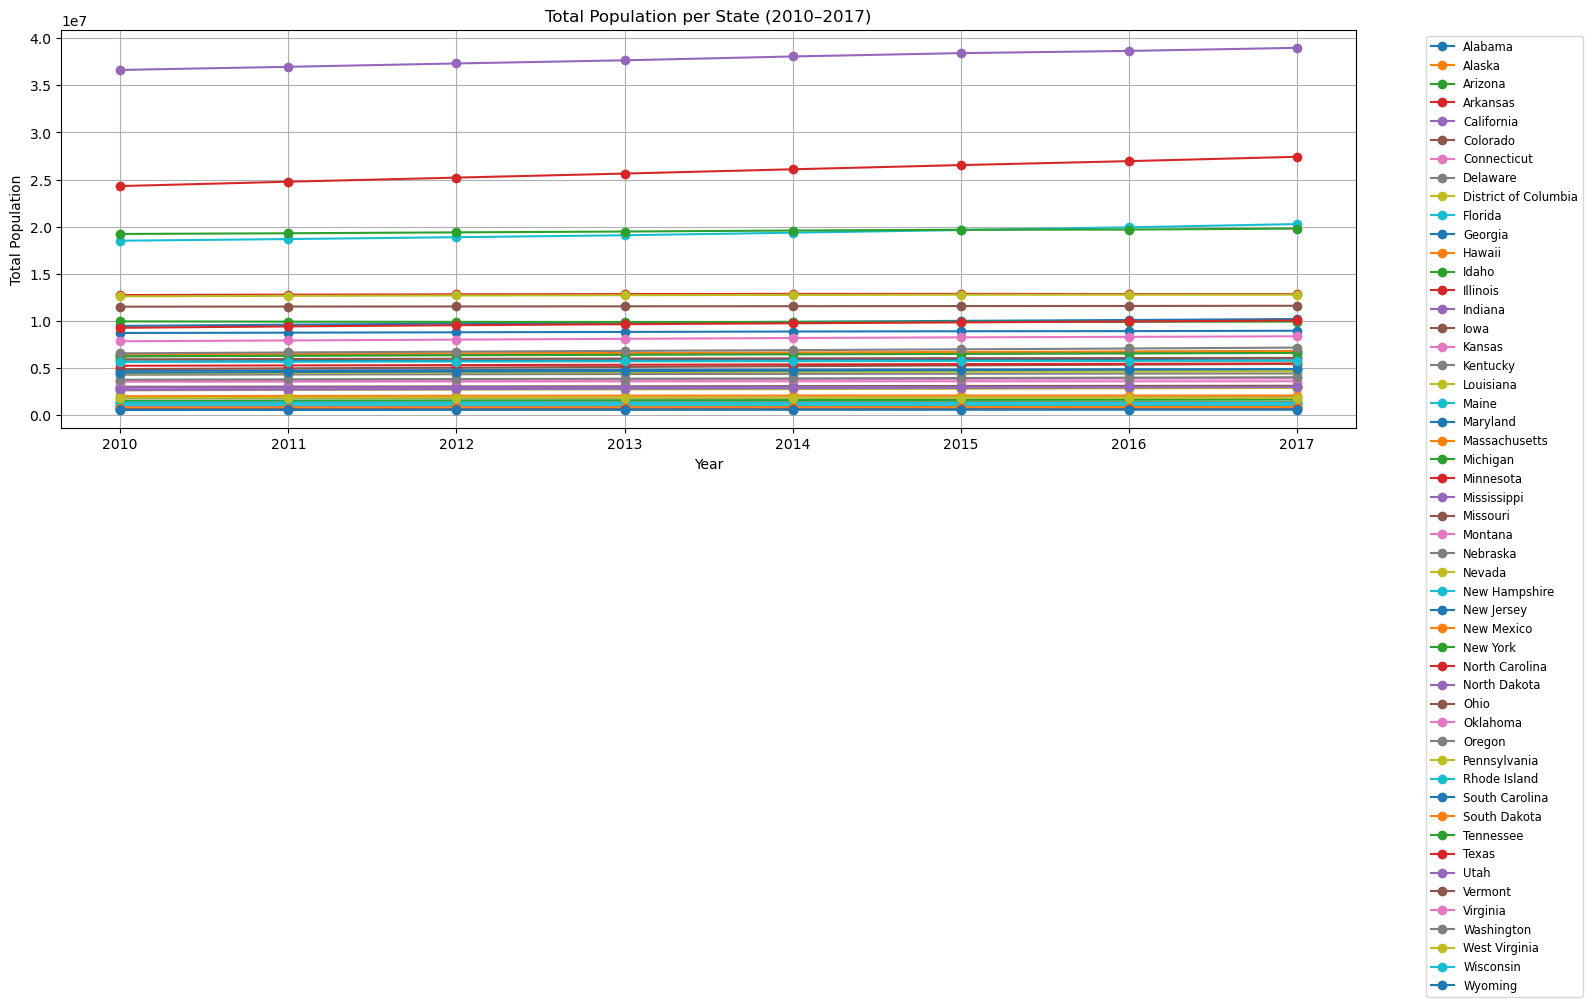

In [21]:
# Filter data for the years 2010 to 2017
filtered_data = new_census_data[(new_census_data['Year'] >= 2010) & (new_census_data['Year'] <= 2017)]

# Group data by State and Year, then sum the total population for each state per year (if multiple records exist)
grouped_data = filtered_data.groupby(['Year', 'State'])['Total Population'].sum().unstack()

# Create a line plot for each state across the years 2010 to 2017
plt.figure(figsize=(16, 8))

# Plot for each state
for state in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[state], label=state, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State (2010–2017)')
plt.xticks(grouped_data.index)  # Ensure years are displayed correctly on the x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Move legend outside of the graph
plt.grid(True)

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()

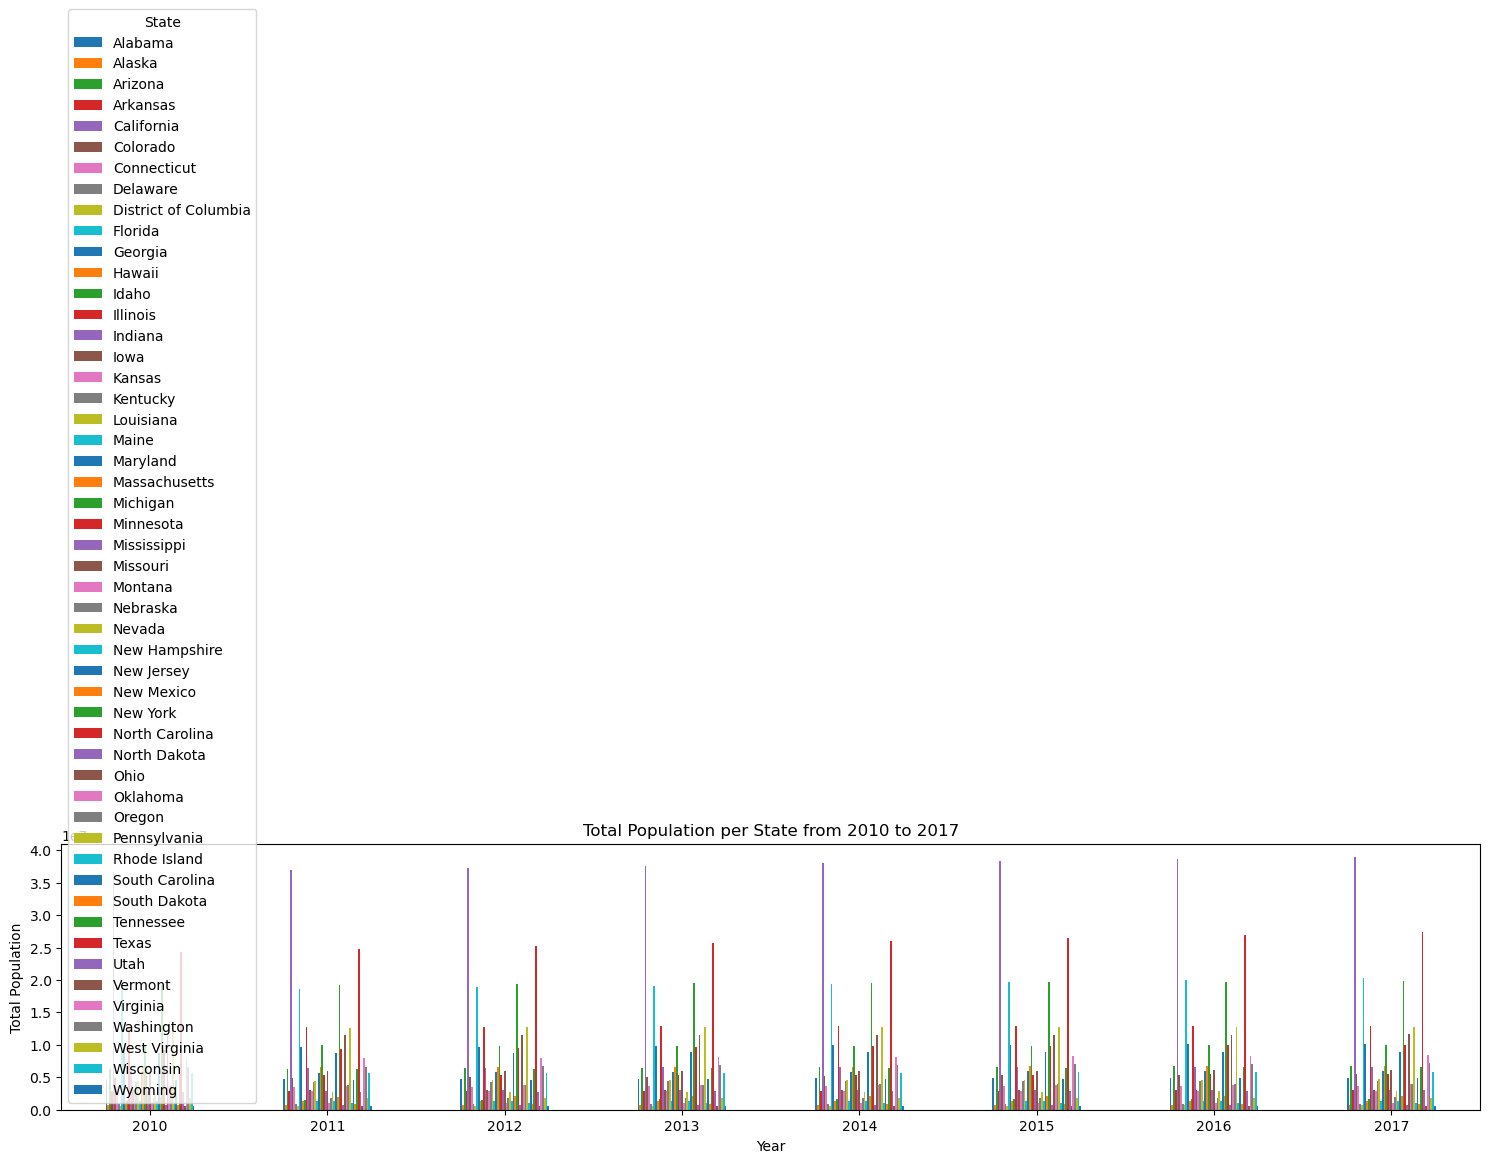

In [22]:
grouped_data = new_census_data.groupby(['Year', 'State'])['Total Population'].sum().reset_index()

# Pivot the data so that states are columns and years are rows
pivot_data = grouped_data.pivot(index='Year', columns='State', values='Total Population')

# Create a bar chart for total population per state over the years
pivot_data.plot(kind='bar', stacked=False, figsize=(15, 8))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population per State from 2010 to 2017')

# Optional: Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()  # Adjusts layout to fit everything nicely
plt.show()

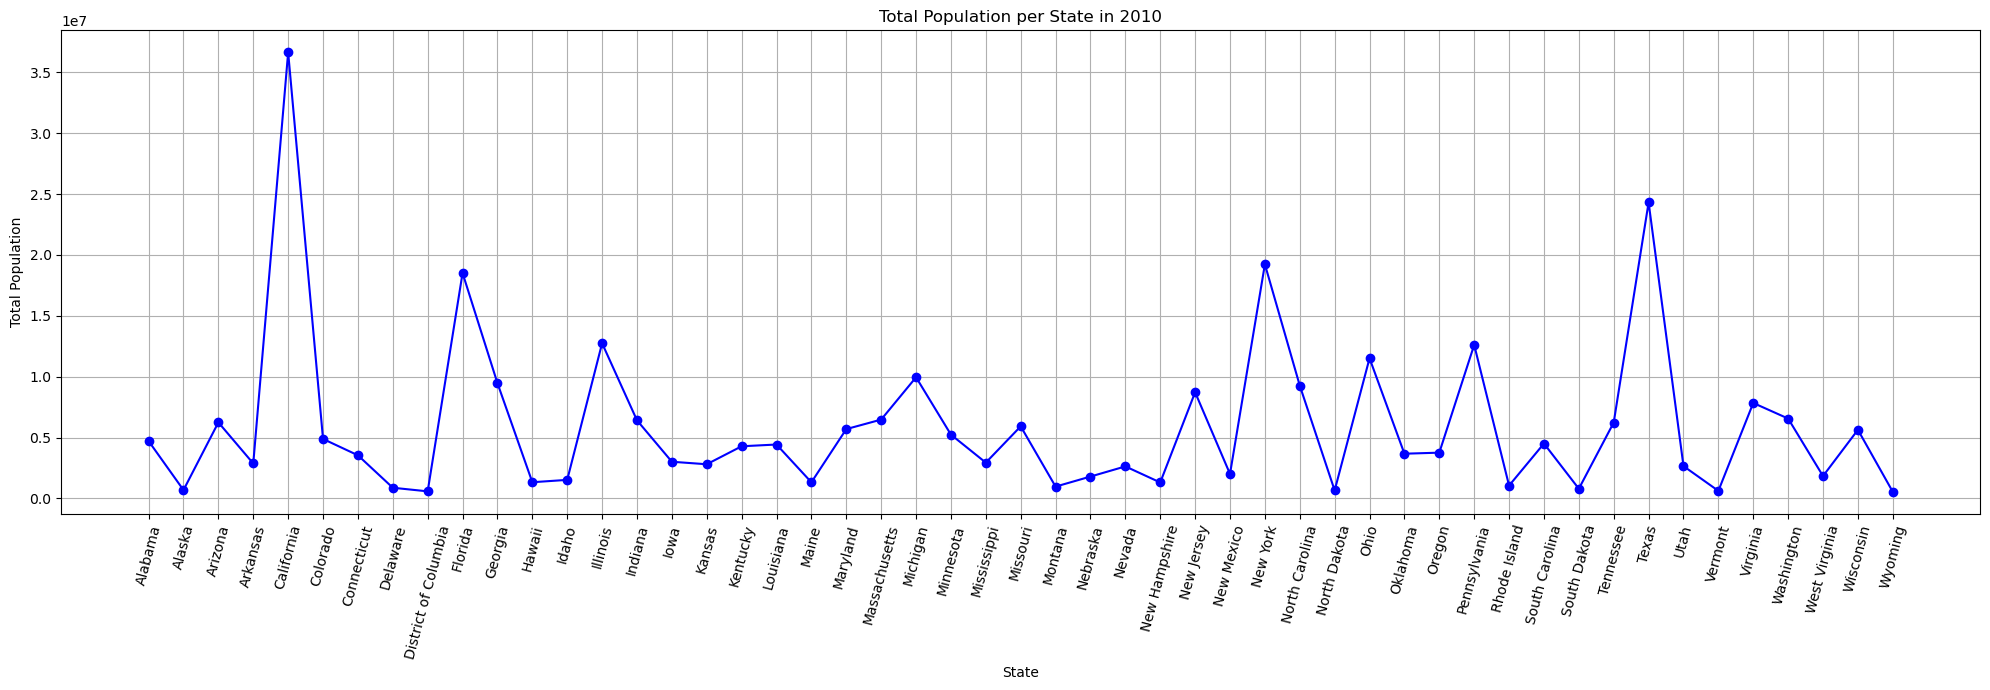

In [23]:
Year_census_data_2010 = pd.DataFrame(Year_census_data_2010)

# Create a line graph for total population per state in 2010
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2010['State'], Year_census_data_2010['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2010')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

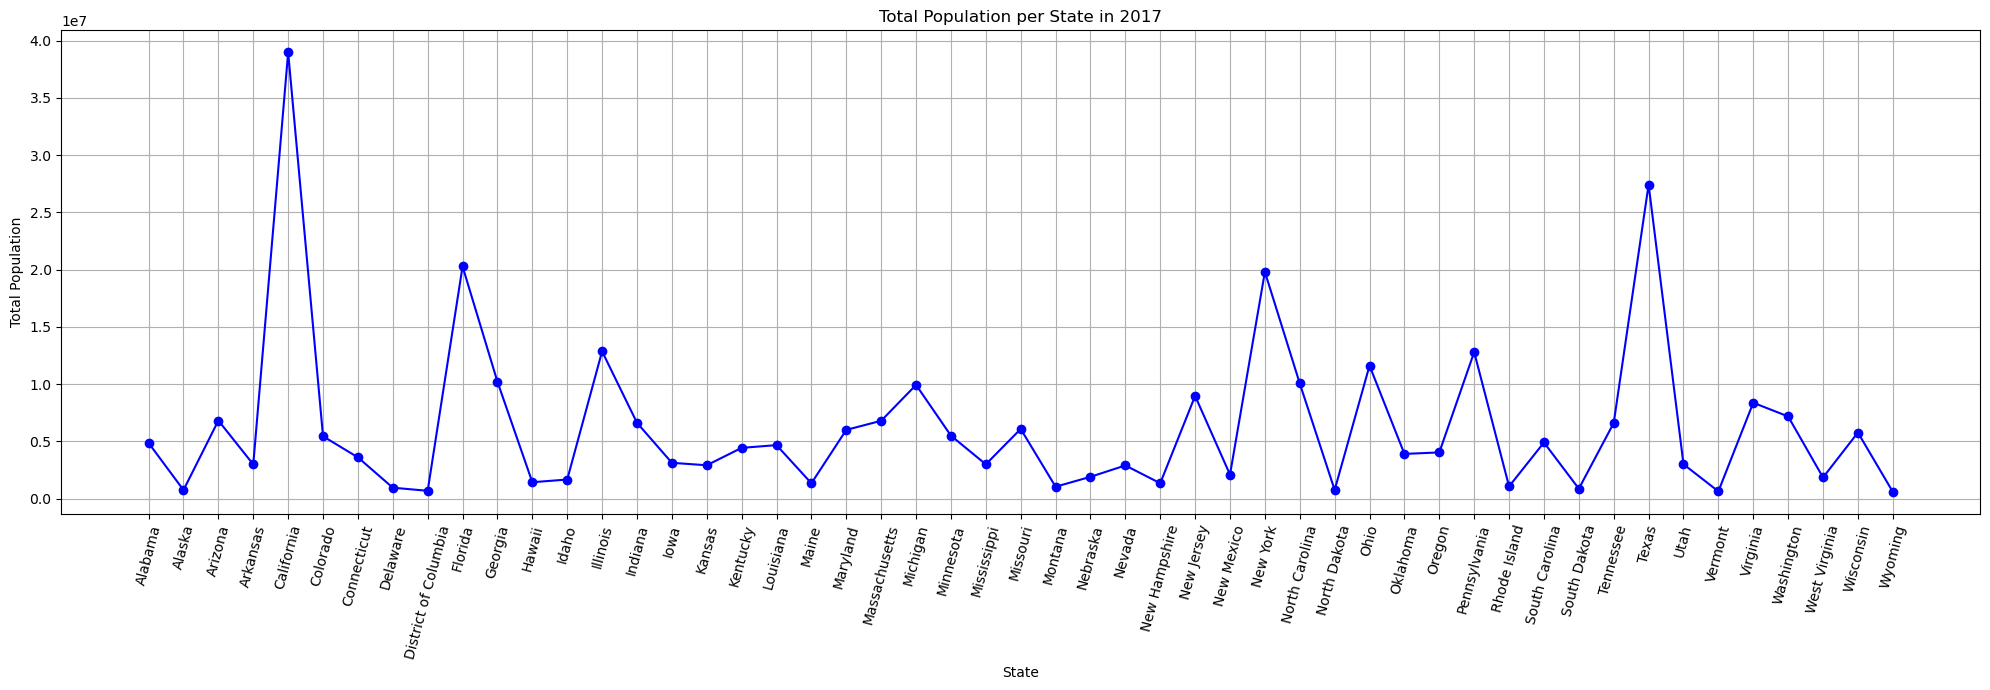

In [24]:
Year_census_data_2017 = pd.DataFrame(Year_census_data_2017)

# Create a line graph for total population per state in 2017
plt.figure(figsize=(20, 7))  # Optional: Adjust figure size

# Plotting the line graph
plt.plot(Year_census_data_2017['State'], Year_census_data_2017['Total Population'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population per State in 2017')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts layout to make room for the x-axis labels
plt.show()

In [25]:
top_10_states = Year_census_data_2010.nlargest(10, 'Total Population')['State'].tolist()

# Step 2: Filter the 2017 data to include only those states
filtered_data_2010 = Year_census_data_2010[Year_census_data_2010['State'].isin(top_10_states)]
filtered_data_2011 = Year_census_data_2011[Year_census_data_2011['State'].isin(top_10_states)]
filtered_data_2012 = Year_census_data_2012[Year_census_data_2012['State'].isin(top_10_states)]
filtered_data_2013 = Year_census_data_2013[Year_census_data_2013['State'].isin(top_10_states)]
filtered_data_2014 = Year_census_data_2014[Year_census_data_2014['State'].isin(top_10_states)]
filtered_data_2015 = Year_census_data_2015[Year_census_data_2015['State'].isin(top_10_states)]
filtered_data_2016 = Year_census_data_2016[Year_census_data_2016['State'].isin(top_10_states)]
filtered_data_2017 = Year_census_data_2017[Year_census_data_2017['State'].isin(top_10_states)]

filtered_data_2017

,Year,State,Total Population,Age Categories 65 Years And Over
365,2017,California,38982847.0,1480311.0
370,2017,Florida,20278447.0,663014.0
371,2017,Georgia,10201635.0,368719.0
374,2017,Illinois,12854526.0,452122.0
383,2017,Michigan,9925568.0,369574.0
393,2017,New York,19798228.0,707740.0
394,2017,North Carolina,10052564.0,367552.0
396,2017,Ohio,11609756.0,397736.0
399,2017,Pennsylvania,12790505.0,436679.0
404,2017,Texas,27419612.0,1024950.0


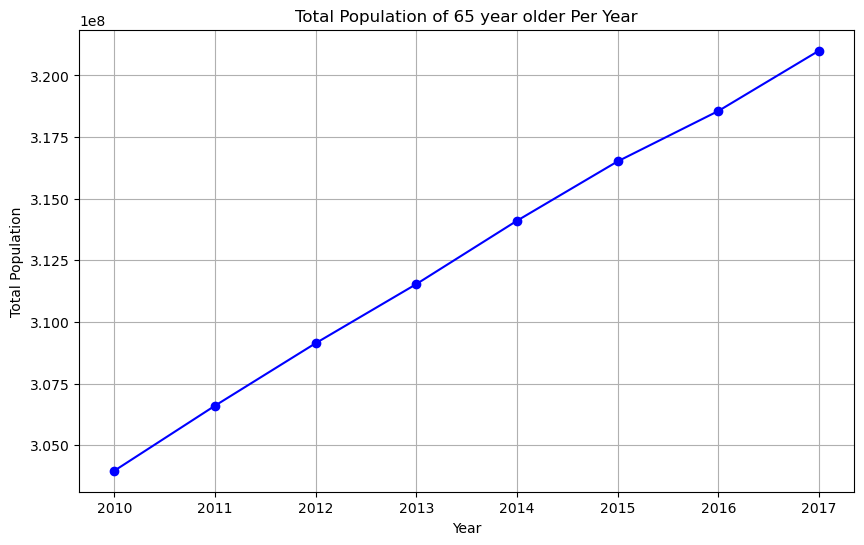

In [26]:
# Grouping data by year and summing the total population for each year
population_per_year = new_census_data.groupby("Year")["Total Population"].sum()

# Create the line plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(population_per_year.index, population_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population of 65 year older Per Year')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [27]:
# print columnds 
new_census_data.columns


Index(['Year', 'State', 'Total Population',
       'Age Categories 65 Years And Over'],
      dtype='object')

In [28]:
medicare_data.columns

Index(['State', 'Medicare 2010', 'Medicare 2011', 'Medicare 2012',
       'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 'Medicare 2016',
       'Medicare 2017', 'Code', 'Item'],
      dtype='object')

In [29]:
new_census_data.columns = new_census_data.columns.str.strip()
medicare_data.columns = medicare_data.columns.str.strip()

In [30]:
print('Year' in new_census_data.columns)
print('State' in new_census_data.columns)
print('Year' in medicare_data.columns)
print('State' in medicare_data.columns)

True
True
False
True


In [31]:
merged_data = pd.merge(new_census_data, medicare_data, on=['State'], how='inner')  # 'inner' will keep common rows
merged_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Code,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,11,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,11,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,11,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,11,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,11,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,11,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,11,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,11,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,11,Medicare Enrollee Population (Thousands)


In [32]:
merged_data = merged_data.dropna()
merged_data.count()

for col in merged_data.columns:
    print(col)

Year
State
Total Population
Age Categories 65 Years And Over
Medicare 2010
Medicare 2011
Medicare 2012
Medicare 2013
Medicare 2014
Medicare 2015
Medicare 2016
Medicare 2017
Code
Item


In [33]:
new_merged_data = merged_data[["Year", "State", "Total Population", "Age Categories 65 Years And Over", "Medicare 2010", "Medicare 2011", "Medicare 2012", "Medicare 2013", "Medicare 2014", "Medicare 2015", "Medicare 2016", "Medicare 2017", "Item"]]
new_merged_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


In [34]:
# Select the top 10 states by Total Population
top_10_states = new_merged_data.nlargest(10, 'Total Population')

# Display the top 10 states
print(top_10_states[['State', 'Total Population']])

          State  Total Population
361  California        38982847.0
310  California        38654206.0
259  California        38421464.0
208  California        38066920.0
157  California        37659181.0
106  California        37325068.0
55   California        36969200.0
4    California        36637290.0
400       Texas        27419612.0
349       Texas        26956435.0


In [35]:
organized_df = new_merged_data.sort_values(by=['Item', 'State','Year'])

# Display the organized DataFrame
organized_df

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
51,2011,Alabama,4747424.0,645650.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
102,2012,Alabama,4777326.0,664048.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
153,2013,Alabama,4799277.0,681497.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
204,2014,Alabama,4817678.0,698563.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2013,Wyoming,570134.0,72407.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
254,2014,Wyoming,575251.0,75358.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
305,2015,Wyoming,579679.0,78257.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)
356,2016,Wyoming,583029.0,80458.0,80,82,86,89,92,95,98,102,Medicare Enrollee Population (Thousands)


In [36]:

# Sorting the DataFrame and resetting the index
sorted_data = new_merged_data.sort_values(by=['Item', 'Year', 'State']).reset_index(drop=True)

# Display the sorted and reindexed DataFrame
sorted_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


In [37]:

# Print the description of the 'Item' column
item_description = new_merged_data['Item'].describe()

# Display the result
item_description

count                                          408
unique                                           1
top       Medicare Enrollee Population (Thousands)
freq                                           408
Name: Item, dtype: object

In [38]:
# Get the unique descriptions of the 'Item' column
unique_item_descriptions = new_merged_data['Item'].unique()

# Print the unique descriptions
print(unique_item_descriptions)

['Medicare Enrollee Population (Thousands)']


In [39]:
organized_data = new_merged_data.sort_values(by=['Item', 'Year', 'State'], ascending=True)

# Display the first few rows of the organized data (or use organized_data.head())
organized_data

,Year,State,Total Population,Age Categories 65 Years And Over,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017,Item
0,2010,Alabama,4712651.0,636208.0,845,864,896,922,947,968,988,1006,Medicare Enrollee Population (Thousands)
1,2010,Alaska,691189.0,50457.0,66,69,73,76,80,84,88,92,Medicare Enrollee Population (Thousands)
2,2010,Arizona,6246816.0,830827.0,930,962,1009,1051,1096,1140,1180,1224,Medicare Enrollee Population (Thousands)
3,2010,Arkansas,2872684.0,405048.0,531,542,559,572,584,594,607,617,Medicare Enrollee Population (Thousands)
4,2010,California,36637290.0,4066739.0,4757,4901,5111,5294,5476,5645,5814,5966,Medicare Enrollee Population (Thousands)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2017,Virginia,8365952.0,303515.0,1141,1173,1227,1269,1311,1349,1389,1427,Medicare Enrollee Population (Thousands)
404,2017,Washington,7169967.0,253125.0,972,1005,1056,1100,1146,1192,1235,1275,Medicare Enrollee Population (Thousands)
405,2017,West Virginia,1836843.0,61792.0,382,386,397,404,411,416,422,427,Medicare Enrollee Population (Thousands)
406,2017,Wisconsin,5763217.0,205743.0,911,931,966,994,1023,1050,1080,1110,Medicare Enrollee Population (Thousands)


In [40]:
# Step 1: Calculate the top 10 states with the highest population
top_10_states = new_census_data.nlargest(10, 'Total Population')

# Step 2: Display the result
print(top_10_states[['State', 'Total Population']])

          State  Total Population
365  California        38982847.0
314  California        38654206.0
263  California        38421464.0
212  California        38066920.0
161  California        37659181.0
110  California        37325068.0
55   California        36969200.0
4    California        36637290.0
404       Texas        27419612.0
353       Texas        26956435.0


In [41]:
year_2010_data = Year_census_data_2010[Year_census_data_2010['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest population for 2010
top_10_states_2010 = year_2010_data.nlargest(20, 'Total Population')

# Step 3: Display the result
print(top_10_states_2010[['State', 'Total Population']])

             State  Total Population
4       California        36637290.0
43           Texas        24311891.0
32        New York        19229752.0
9          Florida        18511620.0
13        Illinois        12745359.0
38    Pennsylvania        12612705.0
35            Ohio        11512431.0
22        Michigan         9952687.0
10         Georgia         9468815.0
33  North Carolina         9271178.0
30      New Jersey         8721577.0
46        Virginia         7841754.0
47      Washington         6561297.0
21   Massachusetts         6477096.0
14         Indiana         6417398.0
2          Arizona         6246816.0
42       Tennessee         6234968.0
25        Missouri         5922314.0
20        Maryland         5696423.0
49       Wisconsin         5637947.0


In [42]:
# Group by the 'Year' column and count the total rows for each year
yearly_row_count = organized_data.groupby('Year').size()

# Print the result
print(yearly_row_count)

Year
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
dtype: int64


In [43]:
year_2010_data = new_merged_data[new_merged_data['Year'] == 2010]

# Step 2: Calculate the top 10 states with the highest Medicare spending for 2010
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')
top_10_states_overall = new_merged_data.groupby('State')['Medicare 2010'].sum().nlargest(10)

# Step 3: Display the result
print(top_10_states_medicare_2010[['State', 'Medicare 2010']])

             State  Medicare 2010
4       California           4757
9          Florida           3375
43           Texas           3001
32        New York           2988
38    Pennsylvania           2283
35            Ohio           1901
13        Illinois           1839
22        Michigan           1651
33  North Carolina           1490
30      New Jersey           1327


In [44]:
medicare_years = ['Medicare 2010', 'Medicare 2011', 'Medicare 2012', 
                  'Medicare 2013', 'Medicare 2014', 'Medicare 2015', 
                  'Medicare 2016', 'Medicare 2017']

medicare_melted = year_2010_data.melt(id_vars=['State', 'Year'], 
                                       value_vars=medicare_years, 
                                       var_name='Medicare Year', 
                                       value_name='Medicare Amount')

# Step 1: Calculate top 10 states based on total Medicare spending across all years
top_10_states_overall = medicare_melted.groupby('State')['Medicare Amount'].sum().nlargest(10)

# Step 2: Display the results
print("Top 10 States by Total Medicare Spending:")
print(top_10_states_overall)

Top 10 States by Total Medicare Spending:
State
California        42964
Florida           30618
Texas             27536
New York          25881
Pennsylvania      19648
Ohio              16602
Illinois          15974
Michigan          14563
North Carolina    13478
New Jersey        11532
Name: Medicare Amount, dtype: int64


In [45]:
top_10_states_medicare_2010 = year_2010_data.nlargest(10, 'Medicare 2010')

# Step 2: Filter the original DataFrame for the top 10 states
# Assuming `year_2010_data` is the original DataFrame containing all years' data
top_10_states_all_years = year_2010_data[year_2010_data['State'].isin(top_10_states_medicare_2010['State'])]

# Step 3: Select relevant columns including Medicare spending for 2011 to 2017
top_10_states_all_years = top_10_states_all_years[["State", "Medicare 2010", "Medicare 2011", 
                                                     "Medicare 2012", "Medicare 2013", 
                                                     "Medicare 2014", "Medicare 2015", 
                                                     "Medicare 2016", "Medicare 2017"]]
top_10_states_all_years.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(f"The Top 10 states with expenditure on medicare: ")
top_10_states_all_years.head()

The Top 10 states with expenditure on medicare: 


,State,Medicare 2010,Medicare 2011,Medicare 2012,Medicare 2013,Medicare 2014,Medicare 2015,Medicare 2016,Medicare 2017
0,California,4757,4901,5111,5294,5476,5645,5814,5966
1,Florida,3375,3472,3621,3757,3900,4040,4164,4289
2,Illinois,1839,1872,1935,1982,2026,2063,2109,2148
3,Michigan,1651,1689,1754,1805,1853,1894,1938,1979
4,New Jersey,1327,1352,1398,1430,1462,1489,1523,1551


In [46]:
year_to_filter = 2010

# Filter the data for the specified year
filtered_data_by_year = organized_data[organized_data['Year'] == year_to_filter]

# Print the unique item descriptions for that year
unique_items = filtered_data_by_year['Item'].unique()

# Print the unique item descriptions
print(f"Unique item descriptions for the year {year_to_filter}:")
for item in unique_items:
    print(item)

Unique item descriptions for the year 2010:
Medicare Enrollee Population (Thousands)


In [48]:
#Total Population Enrollment in Medicare between 2010 and 2017

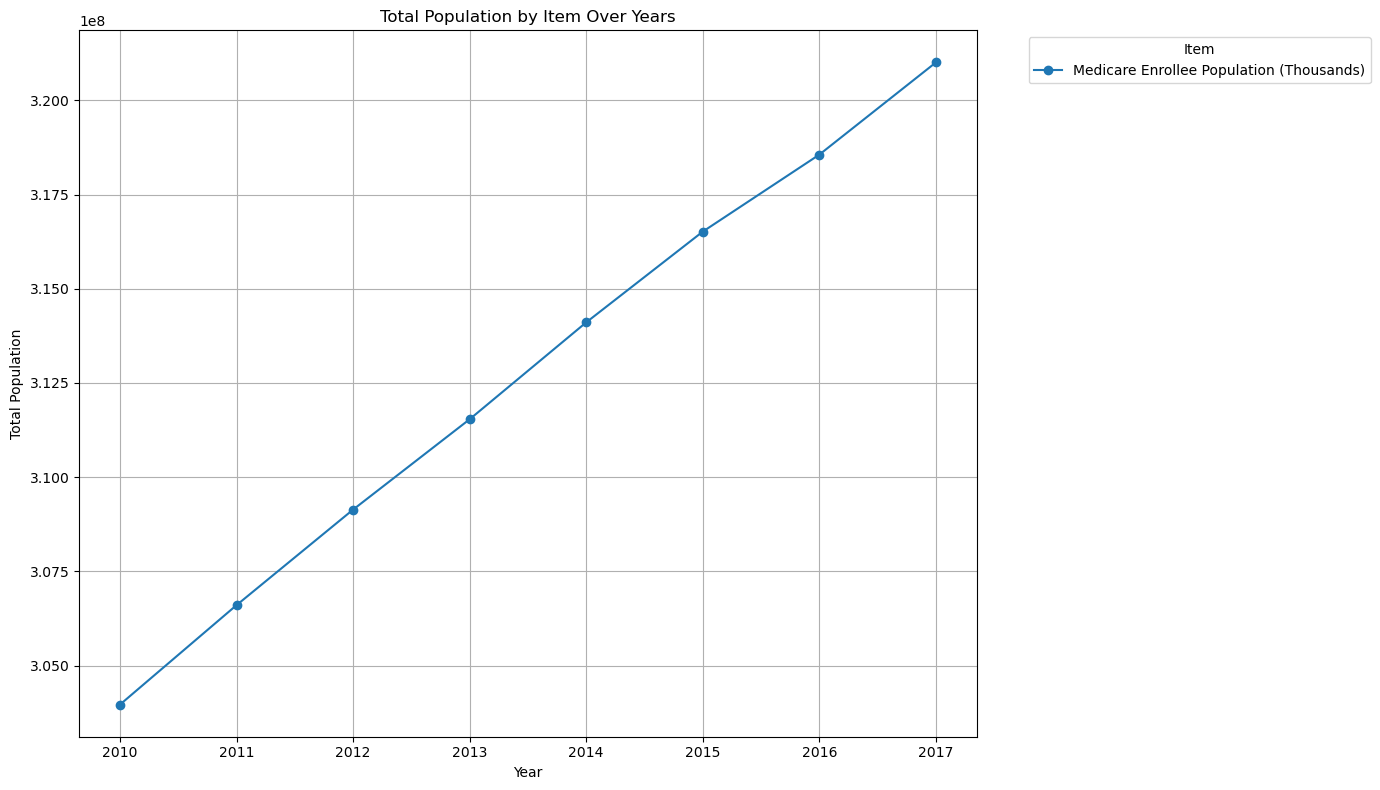

In [50]:

grouped_data = organized_data.groupby(['Year', 'Item'])['Total Population'].sum().reset_index()

# Step 2: Create a line chart
plt.figure(figsize=(14, 8))

# Loop through each unique Item and plot
for item in grouped_data['Item'].unique():
    item_data = grouped_data[grouped_data['Item'] == item]
    plt.plot(item_data['Year'], item_data['Total Population'], marker='o', label=item)

# Step 3: Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population by Item Over Years')
plt.xticks(grouped_data['Year'].unique())  # Set x-ticks to be the unique years
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [52]:
# Specify the year you want to print
specific_year = 2010  # Change this to the desired year

# Filter the DataFrame for the specified year
year_data = organized_data[organized_data['Year'] == specific_year]

# Print the Year
print(f"Year: {specific_year}")

# Print each State and Item for the specified year
for index, row in year_data.iterrows():
    print(f"  State: {row['State']}, Item: {row['Item']}")

Year: 2010
  State: Alabama, Item: Medicare Enrollee Population (Thousands)
  State: Alaska, Item: Medicare Enrollee Population (Thousands)
  State: Arizona, Item: Medicare Enrollee Population (Thousands)
  State: Arkansas, Item: Medicare Enrollee Population (Thousands)
  State: California, Item: Medicare Enrollee Population (Thousands)
  State: Colorado, Item: Medicare Enrollee Population (Thousands)
  State: Connecticut, Item: Medicare Enrollee Population (Thousands)
  State: Delaware, Item: Medicare Enrollee Population (Thousands)
  State: District of Columbia, Item: Medicare Enrollee Population (Thousands)
  State: Florida, Item: Medicare Enrollee Population (Thousands)
  State: Georgia, Item: Medicare Enrollee Population (Thousands)
  State: Hawaii, Item: Medicare Enrollee Population (Thousands)
  State: Idaho, Item: Medicare Enrollee Population (Thousands)
  State: Illinois, Item: Medicare Enrollee Population (Thousands)
  State: Indiana, Item: Medicare Enrollee Population (Thous

In [54]:
#Medicare spending per state; comparison between two year 2010 and 2017

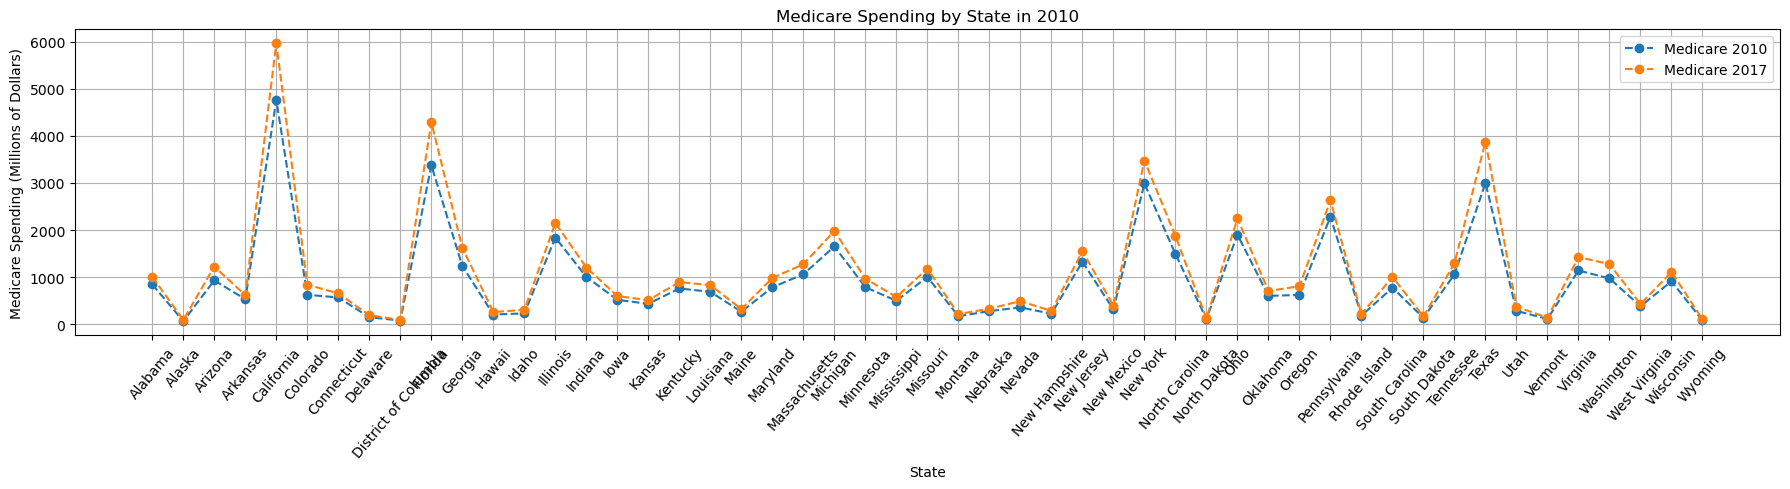

In [56]:
# Specify the year you want to plot
specific_year = 2010  # Change this to your desired year

# Filter the merged data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Set up the plot
plt.figure(figsize=(18, 5))

# Plotting Medicare spending per state for the specified year
plt.plot(year_data['State'], year_data['Medicare 2010'], marker='o', linestyle='--', label='Medicare 2010')

plt.plot(year_data['State'], year_data['Medicare 2017'], marker='o', linestyle='--', label='Medicare 2017')

# Add more lines for additional Medicare years if needed

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare Spending (Millions of Dollars)')
plt.title(f'Medicare Spending by State in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Adding a legend
plt.legend()

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
Top ten states in Medicare expenditure in 2010 and 2017

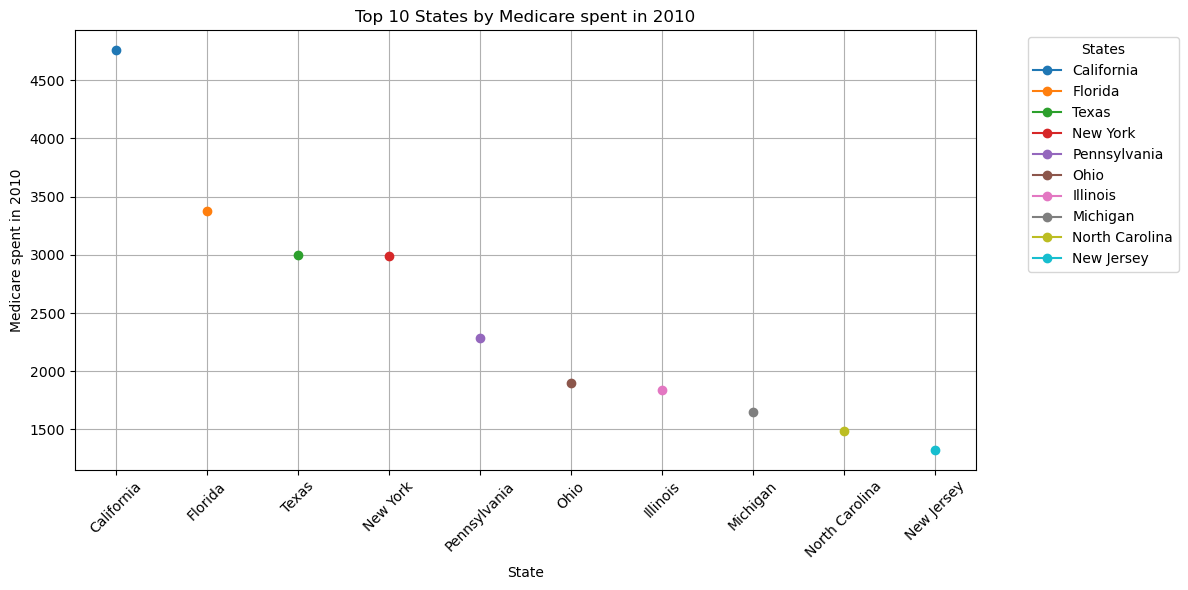

In [58]:
specific_year = 2010

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2010')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2010'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare spent in 2010')
plt.title(f'Top 10 States by Medicare spent in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

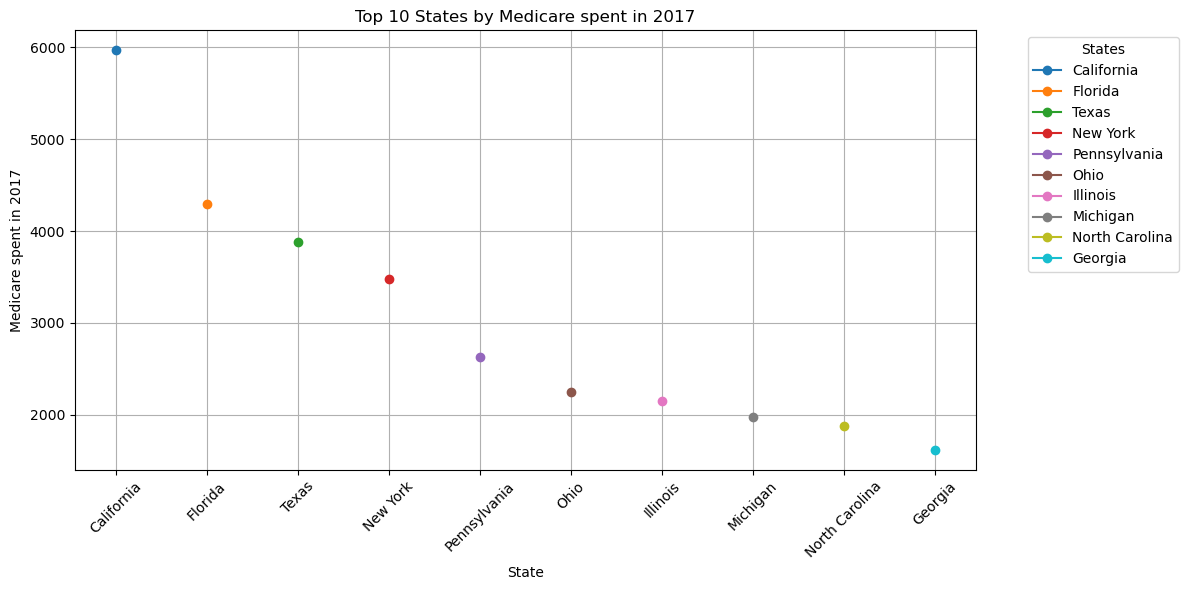

In [60]:
specific_year = 2017

# Step 1: Filter the data for the specific year
year_data = new_merged_data[new_merged_data['Year'] == specific_year]

# Step 2: Get the top 10 states by a specific metric (e.g., 'Medicare 2010')
top_10_states = year_data.nlargest(10, 'Medicare 2017')

# Step 3: Plotting the data
plt.figure(figsize=(12, 6))

# Create a line plot for each state
for index, row in top_10_states.iterrows():
    plt.plot(row['State'], row['Medicare 2017'], marker='o', label=row['State'])

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Medicare spent in 2017')
plt.title(f'Top 10 States by Medicare spent in {specific_year}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [64]:
#Comparison total population in 2010 and 2017

In [66]:
# Step 1: Filter the data for 2010 and 2017
data_2010 = new_merged_data[new_merged_data['Year'] == 2010]
data_2017 = new_merged_data[new_merged_data['Year'] == 2017]

# Step 2: Combine the data
# We will keep only the relevant columns for comparison
comparison_data = pd.concat([data_2010[['State', 'Total Population', 'Medicare 2010']],
                              data_2017[['State', 'Total Population', 'Medicare 2017']]], 
                             keys=['2010', '2017']).reset_index(level=0).rename(columns={'level_0': 'Year'})

# Optional: Resetting index for better visualization
comparison_data.reset_index(drop=True, inplace=True)

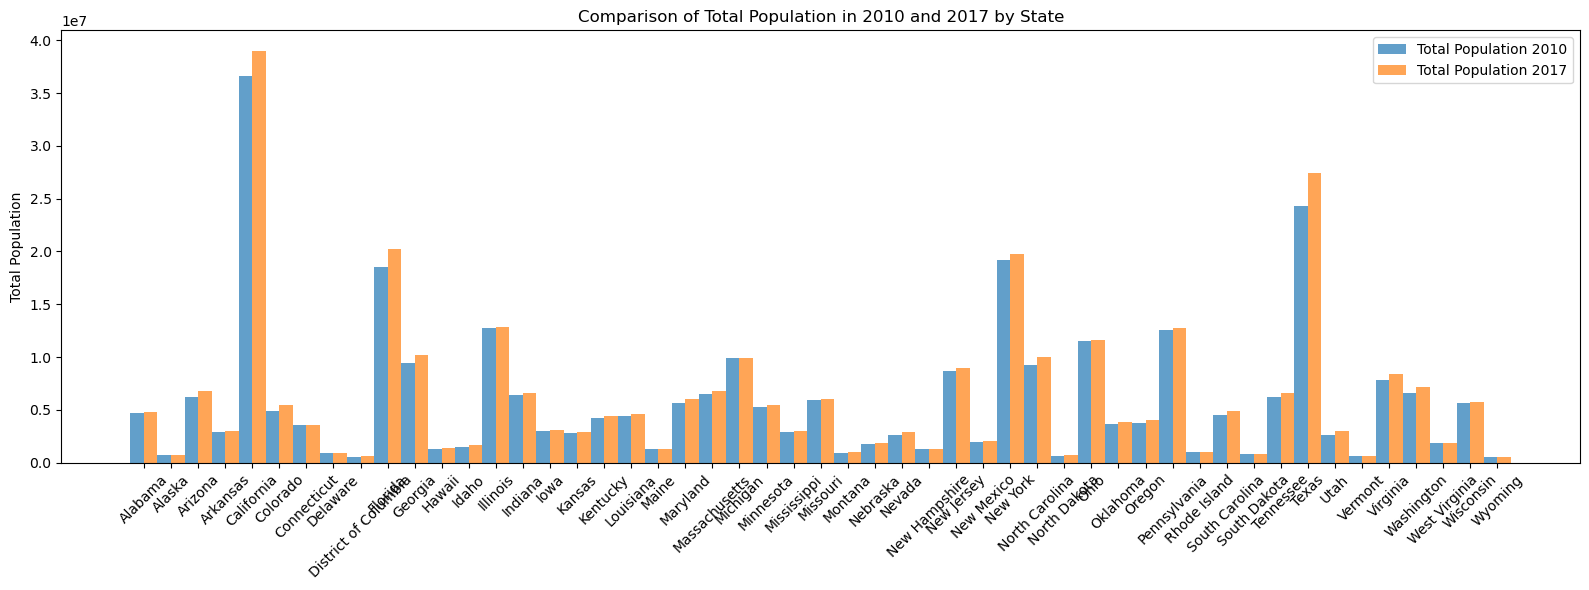

In [68]:
states = comparison_data['State'].unique()
indices = np.arange(len(states))  # create a range for states

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Plotting Total Population for 2010
width = 0.5  # Bar width
population_2010 = comparison_data[comparison_data['Year'] == '2010']['Total Population']
population_2017 = comparison_data[comparison_data['Year'] == '2017']['Total Population']

# Create bar plots
ax.bar(indices - width/2, population_2010, width, label='Total Population 2010', alpha=0.7)
ax.bar(indices + width/2, population_2017, width, label='Total Population 2017', alpha=0.7)

# Adding labels and title
ax.set_ylabel('Total Population')
ax.set_title('Comparison of Total Population in 2010 and 2017 by State')
ax.set_xticks(indices)  # Set x-ticks to indices
ax.set_xticklabels(states, rotation=45)  # Set the tick labels to states
ax.legend()

plt.tight_layout()
plt.show()

In [70]:
#Relation betweent age and medicare between 2010 and 2017

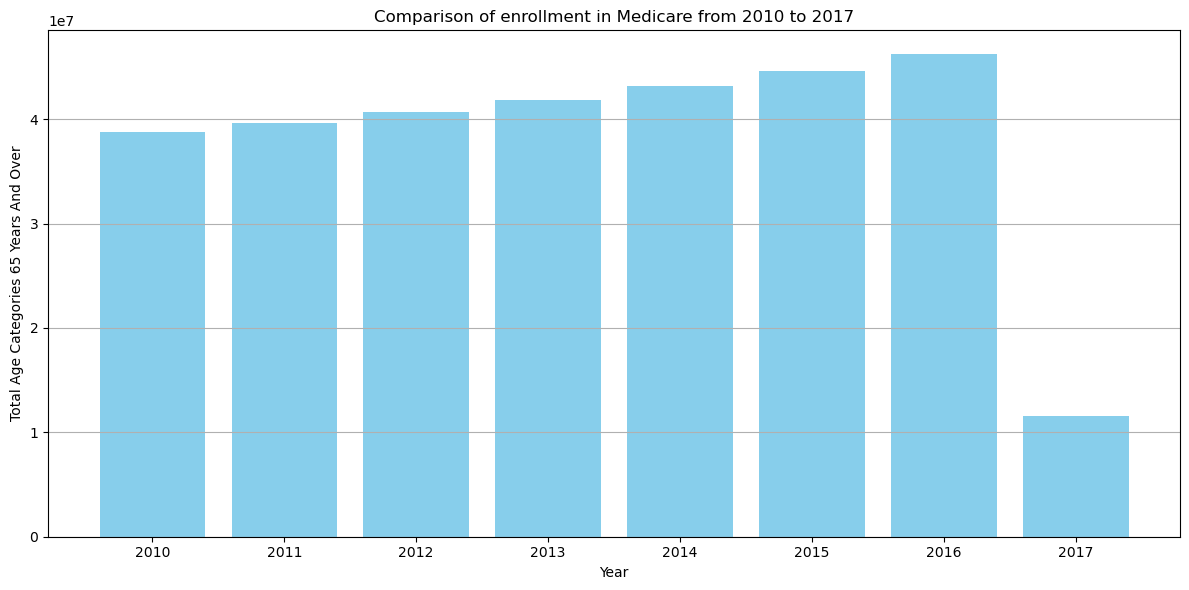

In [72]:
age_65_over = new_merged_data.groupby('Year')['Age Categories 65 Years And Over'].sum().reset_index()

# Step 2: Plotting the data
plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(age_65_over['Year'], age_65_over['Age Categories 65 Years And Over'], color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Age Categories 65 Years And Over')
plt.title('Comparison of enrollment in Medicare from 2010 to 2017')

# Optional: Add gridlines for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by Year and State, and then get the first unique Item description
grouped_data = organized_data.groupby(['Year', 'State', 'Age Categories 65 Years And Over'])['Item'].first().reset_index()

# Get unique years from the grouped data
unique_years = grouped_data['Year'].unique()

# Loop through each year
for year in unique_years:
    print(f"Year: {year}")
    
    # Filter the DataFrame for the current year
    year_data = grouped_data[grouped_data['Year'] == year]
    
    # Print each State and Item for the current year
    for index, row in year_data.iterrows():
        print(f"  State: {row['State']}, Item: {row['Item']}, Age 65 + spend in thousand: {row['Age Categories 65 Years And Over']}")
    
    # Optional: Add a separator for better readability between years
    print()  # New line for better separation between years